# TP1 - Apprentissage Supervisé

Mateo MILLE \
Nerea PRUNEAU

In [89]:
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt # for a good visualization of the trees 

## Part 1 : Basic tests

In [90]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]


In [91]:
# Build the decision tree.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [92]:
# Now we can ask the decision tree to predict the outcome for unknown examples.
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

# Expectd output [0, 1, 0]

array([1, 1, 0])

## Part 2 : Visualization 

In [93]:
# First method visualization of a decision tree
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



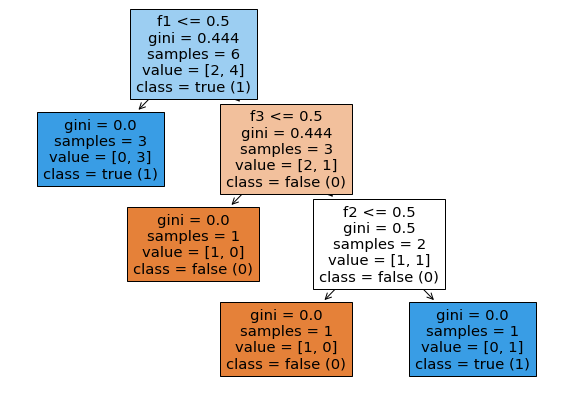

In [94]:
# More readable method 
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

# figsize : restrains the size of the plot,
# feature_names : gives the names of the different features,
# class_names : corresponds to human readable labels for each class,
# filled : is a boolean indicating a preference to show a colorful tree.

Tasks:\
Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation.


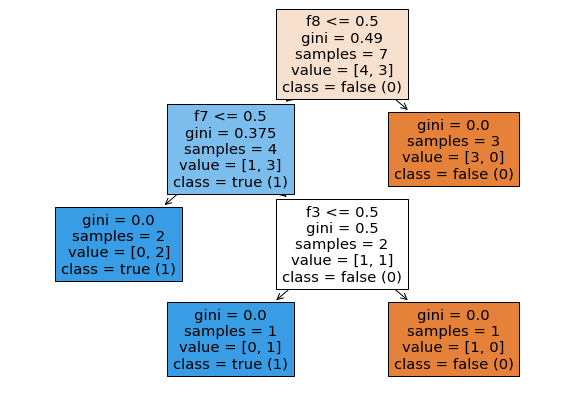

In [95]:
# Dataset 
# debut 
X_Test = [[1,0,1,0,1,0,1,0],[0,0,0,0,1,0,1,0],[1,1,1,1,0,0,0,0],[0,0,0,1,0,1,0,1],[1,0,1,1,1,0,0,1],[0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1]]
Y_Test = [0,1,1,0,0,1,0]

# Build the decision tree.
clf_test = tree.DecisionTreeClassifier()
clf_test = clf.fit(X_Test, Y_Test)

fig_test = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_test, 
                   feature_names= ("f1","f2","f3","f4", "f5", "f6", "f7", "f8"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

## Part 3 : The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend

In [96]:
# import the dataset 
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
# train_examples : represents the whole binarised training set based on the information gotten from the database
# train_labels : represents the labels associated with the training dataset -> (tendency to re-offend)
# features : represents the features associated with each binary field in the training dataset
# prediction : How many years will pass in average before the person re-offend

Have a look at the different parameters of the DecisionTreeClassifier.fit function. We will be studying three parameters:

    splitter
    max_depth
    min_samples_leaf

What do they represent?

<p style="color : blue">
splitter : the strategy to choose the split at each node. 
</p>
<p style="color : blue">
max_depth : allows to define a maximum depth of the tree and prevents from overfitting controlling the size of the tree 
</p>
<p style="color : blue"> 
min_samples_leaf : to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered
</p>

Tasks:

    1: Build severals decision trees (different parameters) and visualize them
    2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test multiple times.
    3: Do again the evaluation using 5-cross-validation
    4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs.
    5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters?
    6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.


### 1. Several decision trees

[Text(173.6775, 199.32, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(89.28, 163.07999999999998, 'X[52] <= 0.5\ngini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(44.64, 126.83999999999999, 'X[8] <= 0.5\ngini = 0.496\nsamples = 2012\nvalue = [1101, 911]'),
 Text(22.32, 90.6, 'X[79] <= 0.5\ngini = 0.5\nsamples = 1651\nvalue = [841, 810]'),
 Text(11.16, 54.359999999999985, 'X[132] <= 0.5\ngini = 0.472\nsamples = 693\nvalue = [264, 429]'),
 Text(5.58, 18.119999999999976, 'gini = 0.446\nsamples = 540\nvalue = [181, 359]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.496\nsamples = 153\nvalue = [83, 70]'),
 Text(33.480000000000004, 54.359999999999985, 'X[117] <= 0.5\ngini = 0.479\nsamples = 958\nvalue = [577, 381]'),
 Text(27.9, 18.119999999999976, 'gini = 0.451\nsamples = 621\nvalue = [408, 213]'),
 Text(39.06, 18.119999999999976, 'gini = 0.5\nsamples = 337\nvalue = [169, 168]'),
 Text(66.96000000000001, 90.6, 'X[116] <= 0.5\ngini = 0.403\n

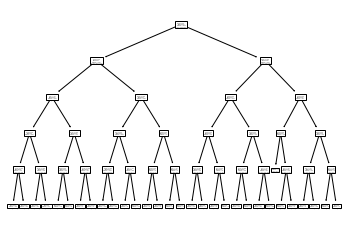

In [97]:
clf_bigdepth = tree.DecisionTreeClassifier(max_depth=5)
clf_bigdepth = clf_bigdepth.fit(train_examples, train_labels)
tree.plot_tree(clf_bigdepth)

[Text(167.4, 163.07999999999998, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(83.7, 54.360000000000014, 'gini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.443\nsamples = 1657\nvalue = [549, 1108]')]

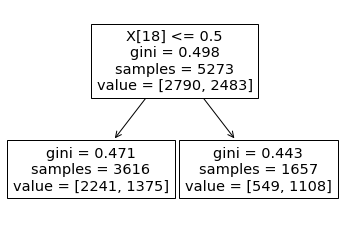

In [98]:
clf_smalldepth = tree.DecisionTreeClassifier(max_depth=1)
clf_smalldepth = clf_smalldepth.fit(train_examples, train_labels)
tree.plot_tree(clf_smalldepth)

[Text(225.14115566037734, 210.192, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(149.41813893653514, 195.696, 'X[52] <= 0.5\ngini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(69.98927958833619, 181.2, 'X[27] <= 0.5\ngini = 0.496\nsamples = 2012\nvalue = [1101, 911]'),
 Text(24.693653516295026, 166.704, 'X[116] <= 0.5\ngini = 0.403\nsamples = 361\nvalue = [260, 101]'),
 Text(17.22813036020583, 152.208, 'X[98] <= 0.5\ngini = 0.365\nsamples = 204\nvalue = [155, 49]'),
 Text(14.931046312178387, 137.712, 'X[146] <= 0.5\ngini = 0.355\nsamples = 178\nvalue = [137, 41]'),
 Text(9.188336192109777, 123.216, 'X[45] <= 0.5\ngini = 0.362\nsamples = 156\nvalue = [119, 37]'),
 Text(4.594168096054888, 108.72, 'X[0] <= 0.5\ngini = 0.38\nsamples = 55\nvalue = [41, 14]'),
 Text(2.297084048027444, 94.22399999999999, 'gini = 0.332\nsamples = 38\nvalue = [30, 8]'),
 Text(6.891252144082332, 94.22399999999999, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(13.7825

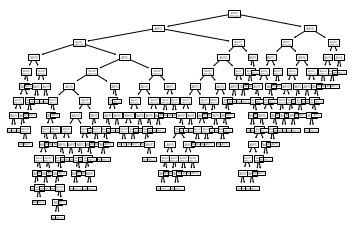

In [99]:
clf_bigsampleleaf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf_bigsampleleaf = clf_bigsampleleaf.fit(train_examples, train_labels)
tree.plot_tree(clf_bigsampleleaf)

[Text(222.14164212647242, 211.04470588235293, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(141.70103843769374, 198.25411764705882, 'X[52] <= 0.5\ngini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(71.66131432114074, 185.4635294117647, 'X[27] <= 0.5\ngini = 0.496\nsamples = 2012\nvalue = [1101, 911]'),
 Text(29.99293242405456, 172.6729411764706, 'X[116] <= 0.5\ngini = 0.403\nsamples = 361\nvalue = [260, 101]'),
 Text(21.79417234965902, 159.88235294117646, 'X[98] <= 0.5\ngini = 0.365\nsamples = 204\nvalue = [155, 49]'),
 Text(15.35970241785493, 147.09176470588235, 'X[146] <= 0.5\ngini = 0.355\nsamples = 178\nvalue = [137, 41]'),
 Text(10.793304401735897, 134.30117647058825, 'X[154] <= 0.5\ngini = 0.362\nsamples = 156\nvalue = [119, 37]'),
 Text(6.642033477991321, 121.51058823529411, 'X[0] <= 0.5\ngini = 0.352\nsamples = 101\nvalue = [78, 23]'),
 Text(3.3210167389956604, 108.72, 'X[36] <= 0.5\ngini = 0.379\nsamples = 67\nvalue = [50, 17]'),
 Text(1.6

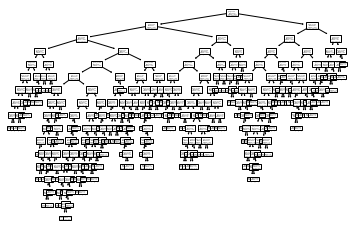

In [100]:
clf_smallsampleleaf = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf_smallsampleleaf = clf_smallsampleleaf.fit(train_examples, train_labels)
tree.plot_tree(clf_smallsampleleaf)

[Text(244.4523791388825, 212.004, 'X[18] <= 0.995\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(183.51475195447227, 201.132, 'X[52] <= 0.41\ngini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(140.84319671188777, 190.26, 'X[8] <= 0.382\ngini = 0.496\nsamples = 2012\nvalue = [1101, 911]'),
 Text(105.77974821798114, 179.388, 'X[79] <= 0.564\ngini = 0.5\nsamples = 1651\nvalue = [841, 810]'),
 Text(76.5309381467004, 168.516, 'X[132] <= 0.433\ngini = 0.472\nsamples = 693\nvalue = [264, 429]'),
 Text(50.674200965739246, 157.644, 'X[0] <= 0.816\ngini = 0.446\nsamples = 540\nvalue = [181, 359]'),
 Text(30.44686134743619, 146.772, 'X[101] <= 0.213\ngini = 0.496\nsamples = 167\nvalue = [76, 91]'),
 Text(25.17351115198896, 135.9, 'X[64] <= 0.395\ngini = 0.5\nsamples = 151\nvalue = [75, 76]'),
 Text(18.32200505863417, 125.02799999999999, 'X[142] <= 0.447\ngini = 0.492\nsamples = 114\nvalue = [50, 64]'),
 Text(12.009381467003909, 114.156, 'X[118] <= 0.534\ngini = 0.497\nsampl

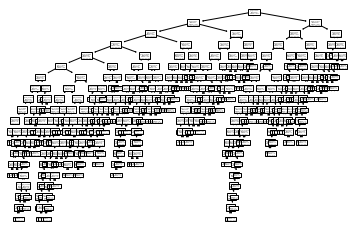

In [101]:
clf_randomsplitter = tree.DecisionTreeClassifier(splitter = "random")
clf_randomsplitter = clf_randomsplitter.fit(train_examples, train_labels)
tree.plot_tree(clf_randomsplitter)

[Text(178.49536944600678, 212.004, 'X[37] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(85.10049212598426, 201.132, 'X[151] <= 0.5\ngini = 0.443\nsamples = 1657\nvalue = [549, 1108]'),
 Text(63.54703599550057, 190.26, 'X[80] <= 0.5\ngini = 0.416\nsamples = 1330\nvalue = [393, 937]'),
 Text(44.24142857142858, 179.388, 'X[92] <= 0.5\ngini = 0.295\nsamples = 334\nvalue = [60, 274]'),
 Text(27.62382452193476, 168.516, 'X[131] <= 0.5\ngini = 0.269\nsamples = 306\nvalue = [49, 257]'),
 Text(26.418695163104616, 157.644, 'X[0] <= 0.5\ngini = 0.265\nsamples = 305\nvalue = [48, 257]'),
 Text(9.641034870641171, 146.772, 'X[101] <= 0.5\ngini = 0.348\nsamples = 67\nvalue = [15, 52]'),
 Text(6.025646794150732, 135.9, 'X[129] <= 0.5\ngini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(2.4102587176602928, 125.02799999999999, 'X[111] <= 0.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(1.2051293588301464, 114.156, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(3.615

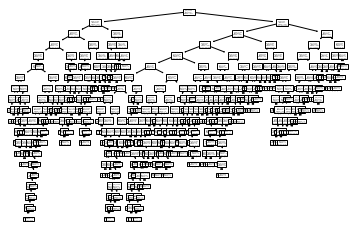

In [102]:
clf_bestsplitter = tree.DecisionTreeClassifier(splitter="best")
clf_bestsplitter = clf_bestsplitter.fit(train_examples, train_labels)
tree.plot_tree(clf_bestsplitter)

### 2: Evaluation on different trees

In [103]:
trainingPartition = round(train_labels.size*0.8)

trainingData = train_examples[:trainingPartition]
testingData = train_examples[trainingPartition:]

trainingLabel = train_labels[:trainingPartition]
testingLabel = train_labels[trainingPartition:]

In [118]:
# Trained with the same data

clf_1 = tree.DecisionTreeClassifier(min_samples_leaf=5,max_depth=10,splitter="best")
clf_1 = clf_1.fit(trainingData,trainingLabel)

clf_2 = tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=10,splitter="best")
clf_2 = clf_2.fit(trainingData,trainingLabel)

clf_3 = tree.DecisionTreeClassifier(min_samples_leaf=5,max_depth=1,splitter="random")
clf_3 = clf_3.fit(trainingData,trainingLabel)

clf_4 = tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=20,splitter="random")
clf_4 = clf_4.fit(trainingData,trainingLabel)

clf_5 = tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=50,splitter="best")
clf_5 = clf_5.fit(trainingData,trainingLabel)

clf_6 = tree.DecisionTreeClassifier()
clf_6 = clf_6.fit(trainingData,trainingLabel)

In [121]:
from sklearn.metrics import *
clf_1_predict = clf_1.predict(testingData)
clf_2_predict = clf_2.predict(testingData)
clf_3_predict = clf_3.predict(testingData)
clf_4_predict = clf_4.predict(testingData)
clf_5_predict = clf_5.predict(testingData)
clf_6_predict = clf_6.predict(testingData)


print("Accuracy clf1 : " + str(accuracy_score(testingLabel,clf_1_predict)))
print("Accuracy clf2 : " + str(accuracy_score(testingLabel,clf_2_predict)))
print("Accuracy clf3 : " + str(accuracy_score(testingLabel,clf_3_predict)))
print("Accuracy clf4 : " + str(accuracy_score(testingLabel,clf_4_predict)))
print("Accuracy clf5 : " + str(accuracy_score(testingLabel,clf_5_predict)))
print("Accuracy clf6 : " + str(accuracy_score(testingLabel,clf_6_predict)))


Accuracy clf1 : 0.6407582938388625
Accuracy clf2 : 0.6322274881516587
Accuracy clf3 : 0.6303317535545023
Accuracy clf4 : 0.6303317535545023
Accuracy clf5 : 0.6293838862559241
Accuracy clf6 : 0.6265402843601896


### 3: Cross validation

In [123]:
# Evalutation with the same data set

print("Prediction value : " + prediction)

l = clf_1.predict(testingData)
predictionClf1 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_1 : "+ str(predictionClf1))

l = clf_2.predict(testingData)
predictionClf2 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_2 : "+ str(predictionClf2))

l = clf_3.predict(testingData)
predictionClf3 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_3 : "+ str(predictionClf3))

l = clf_4.predict(testingData)
predictionClf4 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_4 : "+ str(predictionClf4))

l = clf_5.predict(testingData)
predictionClf5 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_5 : "+ str(predictionClf5))

#l = clf_6.predict(testingData)
#predictionClf6 = (np.count_nonzero(l > 0))
#print("Number of recidive predicted by clf_6 : "+ str(predictionClf6))

print("Average prediction : "+ str((predictionClf1+predictionClf2+predictionClf3+predictionClf4+predictionClf5)/5))



Prediction value : two_year_recid
Number of recidive predicted by clf_1 : 417
Number of recidive predicted by clf_2 : 398
Number of recidive predicted by clf_3 : 328
Number of recidive predicted by clf_4 : 416
Number of recidive predicted by clf_5 : 413
Average prediction : 394.4
